In [2]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

import numpy
import pandas as pd

In [7]:
corpus = ["Python is popular in machine learning",
         "Distributed system is important in big data analysis",
        "Machine learning is theoretical foundation of data mining",
        "Learning Python is fun",
        "Playing soccer is fun",
        "Many data scientists like playing soccer",
        "Chinese men's soccer team failed again",
        "Thirty two soccer teams enter World Cup finals"]

vectorizer = CountVectorizer(min_df=1, stop_words="english")
data = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

pd.DataFrame(data.toarray(), index=corpus, columns=vectorizer.get_feature_names()).head(10)

,analysis,big,chinese,cup,data,distributed,enter,failed,finals,foundation,...,playing,popular,python,scientists,soccer,team,teams,theoretical,thirty,world
Python is popular in machine learning,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Distributed system is important in big data analysis,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Machine learning is theoretical foundation of data mining,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Learning Python is fun,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Playing soccer is fun,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Many data scientists like playing soccer,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
Chinese men's soccer team failed again,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
Thirty two soccer teams enter World Cup finals,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,1


In [8]:
"""Singular value decomposition and LSA"""
model = TruncatedSVD(2)
data_n = model.fit_transform(data)
data_n = Normalizer(copy=False).fit_transform(data_n)
data_n

array([[ 0.50851054,  0.86105576],
       [ 0.81777683,  0.57553546],
       [ 0.60883014,  0.79330061],
       [ 0.62372804,  0.78164144],
       [ 0.91874886, -0.39484242],
       [ 0.98024768, -0.19777381],
       [ 0.78731953, -0.61654518],
       [ 0.71694817, -0.69712648]])

In [9]:
pd.DataFrame(data_n, index = corpus, columns = ["component_1", "component_2"])

,component_1,component_2
Python is popular in machine learning,0.508511,0.861056
Distributed system is important in big data analysis,0.817777,0.575535
Machine learning is theoretical foundation of data mining,0.608830,0.793301
Learning Python is fun,0.623728,0.781641
Playing soccer is fun,0.918749,-0.394842
Many data scientists like playing soccer,0.980248,-0.197774
Chinese men's soccer team failed again,0.787320,-0.616545
Thirty two soccer teams enter World Cup finals,0.716948,-0.697126


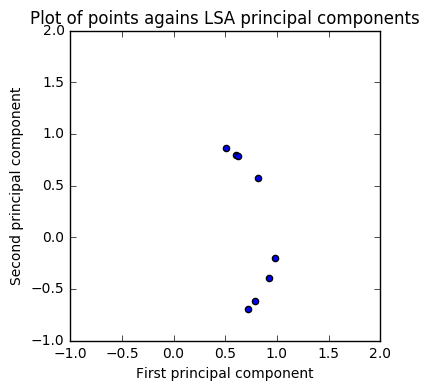

In [11]:
xs = data_n[:,0]
ys = data_n[:,1]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(4,4))
ax = plt.gca()
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
plt.scatter(xs, ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points agains LSA principal components')
plt.show()


In [12]:
similarity = numpy.asarray(numpy.asmatrix(data_n) * numpy.asmatrix(data_n).T)
pd.DataFrame(similarity, index = corpus, columns = corpus).head(10)

,Python is popular in machine learning,Distributed system is important in big data analysis,Machine learning is theoretical foundation of data mining,Learning Python is fun,Playing soccer is fun,Many data scientists like playing soccer,Chinese men's soccer team failed again,Thirty two soccer teams enter World Cup finals
Python is popular in machine learning,1.000000,0.911416,0.992673,0.990209,0.127212,0.328172,-0.130519,-0.235689
Distributed system is important in big data analysis,0.911416,1.000000,0.954460,0.959933,0.524086,0.687798,0.289008,0.185083
Machine learning is theoretical foundation of data mining,0.992673,0.954460,1.000000,0.999821,0.246133,0.439910,-0.009762,-0.116531
Learning Python is fun,0.990209,0.959933,0.999821,1.000000,0.264424,0.456820,0.009156,-0.097722
Playing soccer is fun,0.127212,0.524086,0.246133,0.264424,1.000000,0.978691,0.966787,0.933950
Many data scientists like playing soccer,0.328172,0.687798,0.439910,0.456820,0.978691,1.000000,0.893705,0.840660
Chinese men's soccer team failed again,-0.130519,0.289008,-0.009762,0.009156,0.966787,0.893705,1.000000,0.994277
Thirty two soccer teams enter World Cup finals,-0.235689,0.185083,-0.116531,-0.097722,0.933950,0.840660,0.994277,1.000000


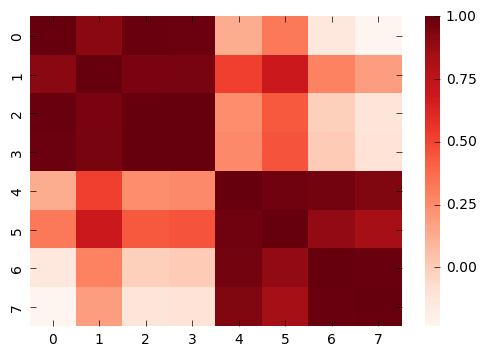

In [13]:
sns.heatmap(similarity,cmap='Reds')

In [14]:
pd.DataFrame(model.components_,index=['component_1','component_2'],columns=vectorizer.get_feature_names()).T

,component_1,component_2
analysis,0.070773,0.057647
big,0.070773,0.057647
chinese,0.101164,-0.091687
cup,0.163603,-0.184113
data,0.370883,0.229668
distributed,0.070773,0.057647
enter,0.163603,-0.184113
failed,0.101164,-0.091687
finals,0.163603,-0.184113
foundation,0.139014,0.209638
